In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Генерування вибірки

In [3]:
randomlist = []
lower_limits = 1#int(input("Enter the liwer limit: "))
upper_limits = 15#int(input("Enter the upper limit: "))

for i in range(0,50):
    n = random.randint(lower_limits,upper_limits)
    randomlist.append(n)
#randomlist=[2,5,0,1,3,0,1,5,4,0,3,3,2,1,4,0,0,2,3,6,0,3,0,1,1]
#randomlist=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,4]
#randomlist=[9, 15, 15, 11, 13, 3, 2, 13, 8, 4, 1, 8, 3, 2, 15, 9, 3, 10, 11, 14, 14, 3, 10, 15, 14, 4, 4, 7, 9, 2, 10, 7, 15, 7, 13, 7, 7, 9, 5, 5, 9, 7, 12, 3, 13, 5, 11, 15, 10, 8]
print(randomlist)

[10, 5, 7, 10, 14, 8, 9, 1, 2, 15, 11, 7, 8, 11, 4, 4, 3, 14, 13, 8, 6, 5, 5, 3, 4, 1, 3, 2, 9, 11, 6, 4, 6, 4, 3, 4, 3, 2, 15, 4, 11, 4, 15, 12, 1, 6, 13, 8, 15, 12]


# - Дискретний статистичний розподіл

### Варіаційний ряд та частотна таблиця

In [4]:
randomlist.sort()
print(randomlist)

[1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 8, 8, 8, 8, 9, 9, 10, 10, 11, 11, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 15, 15]


In [5]:
frequency_table = pd.DataFrame({'event': randomlist})
frequency_table['frequency'] = 1
frequency_table=pd.DataFrame(frequency_table.groupby('event')['frequency'].sum()).reset_index()
display(frequency_table.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
event,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
frequency,3,3,5,8,3,4,2,4,2,2,4,2,2,2,4


### Графічно представлені статистичні дані

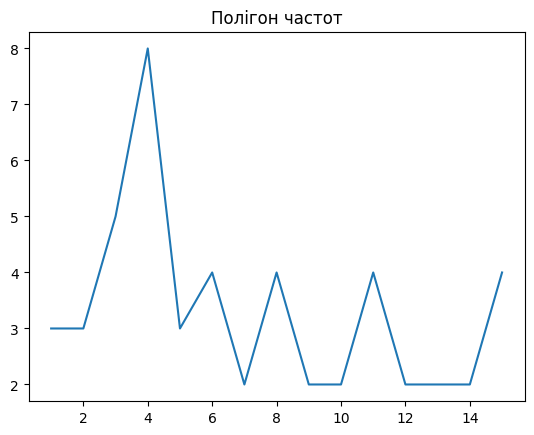

In [6]:
x = frequency_table['event']
y = frequency_table['frequency']

plt.plot(x, y)
plt.title('Полігон частот')
plt.show()

### Графік емпіричної функції розподілу

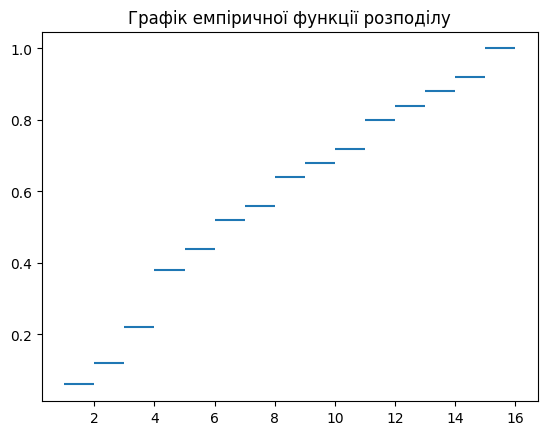

In [7]:
cumulative_frequency = frequency_table['frequency'].cumsum()
relative_frequency = cumulative_frequency / cumulative_frequency.max()
x = list(frequency_table['event'])
x.append(x[-1] + 1)

plt.hlines(relative_frequency, x[:-1], x[1:])
plt.title('Графік емпіричної функції розподілу')
plt.show()

## - Числові характеристики дисктетного розподілу -

### 1.Середновибіркове

In [8]:
buf = frequency_table['event']*frequency_table['frequency'] 
x1=buf.sum()/len(randomlist)
x1

7.22

### 2.Медіана

In [9]:
if len(randomlist)%2 == 0:
    k=len(randomlist)/2
    Me=(randomlist[int(k-1)]+randomlist[int(k)])/2
else:
    k=(len(randomlist)-1)/2
    Me=randomlist[int(k)]
print(Me)

6.0


### 3.Мода

In [10]:
buf=int(frequency_table['frequency'].max())
for i in range(len(frequency_table)):
    if frequency_table['frequency'][i]==buf:
        print(frequency_table['event'][i])

4


### 4.Розмах

In [11]:
frequency_table['event'].max()-frequency_table['event'].min()

14

### 5.Девіація

In [12]:
dev=0
for i in range(len(frequency_table)):
    dev=dev+frequency_table['frequency'][i]*((frequency_table['event'][i]-x1)**2)
dev

918.5799999999998

### 6.Варіанса

In [13]:
S=dev/(len(randomlist)-1)
S

18.746530612244893

### 7.Стандарт

In [14]:
s=S**(1/2)
s

4.329726389997974

### 8.Варіація

In [15]:
v=s/x1
v

0.5996850955675865

### 9.Вибіркова дисперсія

In [16]:
D=dev/len(randomlist)
D

18.371599999999997

### 10.Вибіркове середньо квадратичне відхилення

In [17]:
sigma= pow(D,0.5)
sigma

4.286210447469886

### 11. Асиметрія

In [18]:
frequency_table['xi-x-'] = frequency_table['event']-x1
frequency_table['ni(xi-x-)^3'] = frequency_table['frequency']*frequency_table['xi-x-']**3
As=(frequency_table['ni(xi-x-)^3'].sum()/len(randomlist))/(pow(sigma,3))
As

0.39423805738819767

### 12.Ексцес

In [20]:
frequency_table['ni(xi-x-)^4'] = frequency_table['frequency']*frequency_table['xi-x-']**4
Ex=(frequency_table['ni(xi-x-)^4'].sum()/len(randomlist))/(pow(sigma,4))-3

Ex

-1.0824484132385734

In [21]:
arr=[4,8,10]
ar=[]
for i in arr:
    if len(randomlist) % i == 0:
        if i==4: print("Квартилвій")
        if i==8: print("Октилій")
        if i==10: print("Дицилій")
        step = len(randomlist) // i
        for j in range(step, len(randomlist), step):
            ar.append(randomlist[j])
        print( ar)
        print(ar[len(ar)-1]-ar[0])

Дицилій
[2, 3, 4, 5, 6, 8, 10, 12, 14]
12


# -Інтервальний статистичний розподіл

In [22]:
randomlist = []
lower_limits = 1.5#int(input("Enter the liwer limit: "))
upper_limits = 5.5#int(input("Enter the upper limit: "))

for i in range(0,50):
    n = round(random.uniform(lower_limits,upper_limits), 3)
    randomlist.append(n)
#randomlist=[0, 0.263, 0.442, 0.057, 0.034, 0.42, 0.06, 0.402, 0.108, 0.446, 0.162, 0.12, 0.081, 0.473, 0.406, 0.024, 0.014, 0.235, 0.466, 0.378, 0.205, 0.091, 0.031, 0.238, 0.408, 0.444, 0.155, 0.459, 0.094, 0.479, 0.447, 0.487, 0.218, 0.298, 0.278, 0.234, 0.279, 0.092, 0.25, 0.258, 0.281, 0.148, 0.117, 0.049, 0.455,0.777, 0.865, 0.74, 0.956, 0.843, 0.734, 0.92, 0.655, 0.58, 0.928, 0.887, 0.878, 0.607, 0.968, 0.659, 0.58, 0.543, 0.882, 0.877, 0.806, 0.707, 0.619, 0.709, 0.676, 0.565, 0.681, 0.92, 0.597, 0.71, 0.875, 0.84, 0.619, 0.842, 0.94, 0.665, 0.941, 0.577, 0.604, 0.76, 0.784, 0.885, 0.782, 0.584, 0.661, 0.795, 0.862, 0.654, 0.969, 0.71, 0.963, 0.926, 0.908,1.173, 1.22, 1.406, 1.446, 1.466, 1.235, 1.333, 1.219, 1.393, 1.362, 1.177, 1.144, 1.059, 1.245, 1.413, 1.47, 1.352, 1.044, 1.35, 1.282, 1.267, 1.229, 1.358,1.671, 1.65, 1.631, 1.894, 1.835, 1.515, 1.533, 1.656, 1.869,2.18, 2.5]
#randomlist=[1.613, 2.209, 2.578, 5.071, 3.384, 4.931, 5.395, 2.26, 3.881, 3.846, 4.184, 2.659, 4.732, 2.429, 3.548, 2.141, 2.06, 4.731, 3.888, 4.881, 3.605, 2.303, 2.333, 3.698, 2.274, 3.947, 3.087, 5.131, 3.445, 3.477, 3.269, 4.448, 3.215, 4.54, 4.168, 3.944, 4.889, 4.119, 3.752, 4.834, 4.985, 3.375, 1.646, 1.722, 2.266, 3.669, 2.898, 3.97, 1.911, 5.087]
print(randomlist)

[4.944, 2.001, 2.042, 2.513, 2.925, 2.533, 1.727, 4.66, 2.022, 1.923, 5.312, 5.303, 3.843, 1.679, 1.924, 2.748, 3.697, 1.669, 3.179, 2.99, 3.486, 4.189, 4.998, 3.841, 2.388, 4.298, 3.846, 3.238, 4.343, 4.226, 1.568, 5.414, 2.62, 4.191, 1.968, 4.953, 2.482, 5.0, 2.925, 5.236, 4.266, 4.55, 2.38, 2.111, 5.293, 3.829, 1.922, 2.728, 1.571, 2.829]


In [23]:
randomlist.sort()
print(randomlist)

[1.568, 1.571, 1.669, 1.679, 1.727, 1.922, 1.923, 1.924, 1.968, 2.001, 2.022, 2.042, 2.111, 2.38, 2.388, 2.482, 2.513, 2.533, 2.62, 2.728, 2.748, 2.829, 2.925, 2.925, 2.99, 3.179, 3.238, 3.486, 3.697, 3.829, 3.841, 3.843, 3.846, 4.189, 4.191, 4.226, 4.266, 4.298, 4.343, 4.55, 4.66, 4.944, 4.953, 4.998, 5.0, 5.236, 5.293, 5.303, 5.312, 5.414]


In [27]:
r=1
while (not(2**r<len(randomlist)<=2**(r+1))): r+=1
r=r+1

In [28]:
min_val = min(randomlist)
max_val = max(randomlist)
step=(max_val-min_val)/r#0.5

intervals = [(round(min_val+i*step,3),round(min_val+(i+1)*step, 3)) for i in range(r)]

In [29]:
counts = [0] * r

for value in randomlist:
    for i, interval in enumerate(intervals):
        if interval[0]-1 < value <= interval[1]:
            counts[i] += 1
            break 
interval_table = pd.DataFrame({'interval': intervals, 'frequency':counts })
display(interval_table.T)

,0,1,2,3,4,5
interval,"(1.568, 2.209)","(2.209, 2.85)","(2.85, 3.491)","(3.491, 4.132)","(4.132, 4.773)","(4.773, 5.414)"
frequency,13,9,6,5,8,9


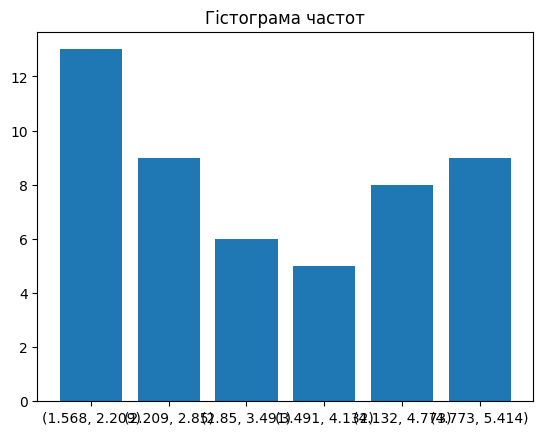

In [30]:
plt.bar(range(len(intervals)), counts, tick_label=[f'{interval}' for interval in intervals])
plt.title('Гістограма частот')
plt.show()

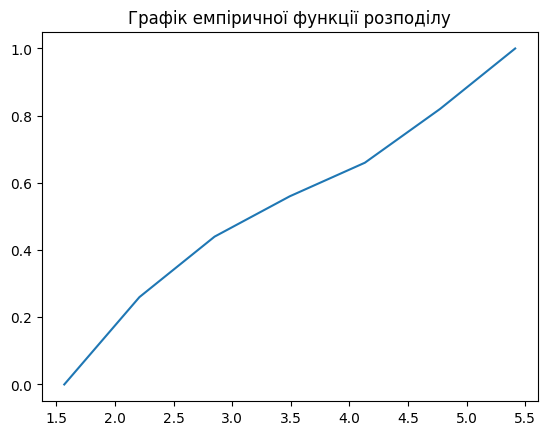

In [31]:
cumulative_frequency = interval_table['frequency'].cumsum()
c_f = pd.concat([pd.Series([0]), cumulative_frequency])
x = list(interval_table['interval'][i][0] for i in range(len(interval_table)))
x.append(interval_table['interval'][len(interval_table)-1][1])

plt.plot(x, c_f/interval_table['frequency'].sum())
plt.title('Графік емпіричної функції розподілу')
plt.show()

## - Числові характеристики інтервального розподілу -

### 1.Середньоквадратичне

In [32]:
interval_table['x-']= list((interval_table['interval'][i][1]+interval_table['interval'][i][0])/2 for i in range(len(interval_table)))
interval_table['x-']=interval_table['x-']*interval_table['frequency']
x = interval_table['x-'].sum()/len(randomlist)
x

3.33716

### 2.Медіана

In [33]:
interval_table['cumsum'] = interval_table['frequency'].cumsum()

Me_index = (interval_table['cumsum'] >= interval_table['cumsum'].iloc[-1] / 2).idxmax()
#Me=interval_table['interval'][Me_index][0]+(interval_table['interval'][Me_index][1]-interval_table['interval'][Me_index][0])*(len(randomlist)/2-interval_table['cumsum'][Me_index-1])/interval_table['frequency'][Me_index]
if Me_index == 0:
    Me = interval_table['interval'][Me_index][0] + (interval_table['interval'][Me_index][1] - interval_table['interval'][Me_index][0]) * (len(randomlist) / 2 - 0) / interval_table['frequency'][Me_index]
else:
    Me = interval_table['interval'][Me_index][0] + (interval_table['interval'][Me_index][1] - interval_table['interval'][Me_index][0]) * (len(randomlist) / 2 - interval_table['cumsum'][Me_index - 1]) / interval_table['frequency'][Me_index]
Me

3.1705

### 3. Moда

In [36]:
mo_index = interval_table['frequency'].idxmax()

Mo=interval_table['interval'][mo_index][0]+(((interval_table['frequency'][mo_index]-interval_table['frequency'][mo_index-1])*(interval_table['interval'][mo_index][1]-interval_table['interval'][mo_index][0]))/((interval_table['frequency'][mo_index]-interval_table['frequency'][mo_index-1])+(interval_table['frequency'][mo_index]-interval_table['frequency'][mo_index+1])))

Mo

KeyError: -1

### 4.Розмах

In [37]:
ro = interval_table['interval'].iloc[-1][1] - interval_table['interval'].iloc[0][0]
ro

3.8459999999999996

### 5. Девіація

In [38]:
interval_table['xi-x-'] = (interval_table['interval'].apply(lambda x: (x[1] + x[0]) / 2)) - x
interval_table['(xi-x-)^2'] = interval_table['frequency'] * interval_table['xi-x-'] ** 2
dev = interval_table['(xi-x-)^2'].sum()
dev

72.15892121999998

### 6. Варіанса

In [39]:
S=dev/(len(randomlist)-1)
S

1.472631045306122

### 7.Стандарт

In [40]:
s=pow(S,0.5)
s

1.213520105027569

### 8.Варіація

In [41]:
v=s/x
v

0.363638574424831

### 9.Вибіркова дисперсія

In [42]:
D=dev/len(randomlist)
D

1.4431784243999997

### 10.Вибіркове середньо квадратичне відхилення

In [43]:
sigma=pow(D,0.5)
sigma

1.2013236135196876

### 11. Асиметрія

In [44]:
interval_table['(xi-x-)^3'] = interval_table['frequency'] * interval_table['xi-x-'] ** 3
As=(interval_table['(xi-x-)^3'].sum()/len(randomlist))/(pow(sigma,3))
As

0.18575154260852342

### 12.Ексцес

In [46]:
interval_table['(xi-x-)^4'] = interval_table['frequency'] * interval_table['xi-x-']**4
Ex=(interval_table['(xi-x-)^4'].sum()/len(randomlist))/(pow(sigma,4))-3
Ex

-1.4697082369545986

In [47]:
arr=[4,8,10]
ar=[]
for i in arr:
    if len(randomlist) % i == 0:
        if i==4: print("Квартилвій")
        if i==8: print("Октилій")
        if i==10: print("Дицилій")
        step = len(randomlist) // i
        for j in range(step, len(randomlist), step):
            ar.append(randomlist[j])
        print( ar)
        print(ar[len(ar)-1]-ar[0])

Дицилій
[1.922, 2.022, 2.482, 2.748, 3.179, 3.841, 4.226, 4.66, 5.236]
3.314
